# ADNI Data set for early prediction of Alzheimer's

Topic = Advanced Deep Learning Architectures for Early Detection of Alzheimer’s Disease Using Multimodal Neuroimaging and Genetic Data.

Data Set Scope =  
* ADNI-1 → GO → ADNI-2 → ADNI-3/4 (2005-2025).
* Baseline + longitudinal visits (sc, bl, m06… up to m96).

Data Types: Integrating MRI, PET, Genomics, and Clinical Data – ADNI DataSet

## EDA - Explanatory Data Analysis

In [ ]:
#import relevant dictionaries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt


In [ ]:
#upload the file
uploaded = files.upload()

Saving ADNIMERGE_08Jun2025.csv to ADNIMERGE_08Jun2025.csv


In [ ]:
#read the csv file
Adni_cd = pd.read_csv('ADNIMERGE_08Jun2025.csv')

/tmp/ipython-input-3-589309508.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  Adni_cd = pd.read_csv('ADNIMERGE_08Jun2025.csv')


In [ ]:
#print head
print (Adni_cd.head())

   RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
0    2   ADNI1    ADNI1  011_S_0002    11      bl  2005-09-08    CN  74.3   
1    3   ADNI1    ADNI1  011_S_0003    11      bl  2005-09-12    AD  81.3   
2    3   ADNI1    ADNI1  011_S_0003    11     m06  2006-03-13    AD  81.3   
3    3   ADNI1    ADNI1  011_S_0003    11     m12  2006-09-12    AD  81.3   
4    3   ADNI1    ADNI1  011_S_0003    11     m24  2007-09-12    AD  81.3   

  PTGENDER  ...  PTAU_bl   FDG_bl PIB_bl AV45_bl  FBB_bl  Years_bl  Month_bl  \
0     Male  ...      NaN  1.33615    NaN     NaN     NaN  0.000000   0.00000   
1     Male  ...    22.83  1.10860    NaN     NaN     NaN  0.000000   0.00000   
2     Male  ...    22.83  1.10860    NaN     NaN     NaN  0.498289   5.96721   
3     Male  ...    22.83  1.10860    NaN     NaN     NaN  0.999316  11.96720   
4     Male  ...    22.83  1.10860    NaN     NaN     NaN  1.998630  23.93440   

   Month   M           update_stamp  
0      0   0  2023

### Data Dictionary for DataSet

| Category                | Column         | What it stands for (lay description)                                                                | Why it might be useful                                |
| ----------------------- | -------------- | --------------------------------------------------------------------------------------------------- | ----------------------------------------------------- |
| **Subject identifiers** | `RID`          | *Research ID* – unique numeric identifier for each participant (stays the same across visits).      | Primary key for merging tables.                       |
|                         | `PTID`         | *Participant ID* – text version (e.g. `011_S_0002`) used in MRI/PET folder names.                   | Match images on disk.                                 |
|                         | `SITE`         | Two–digit site code where the scan / visit occurred.                                                | Scanner differences, bias checks.                     |
| **Study protocol**      | `COLPROT`      | *Collection protocol* – which ADNI phase the data row belongs to (`ADNI1`, `GO`, `ADNI2`, `ADNI3`). | Phase-stratified splits (“leave-phase-out” hold-out). |
|                         | `ORIGPROT`     | Original protocol label (often same as `COLPROT`).                                                  | Legacy tracking.                                      |
| **Visit info**          | `VISCODE`      | Visit code: `sc` = screening, `bl` = baseline, `m06` = month 6, `m12`, …                            | Longitudinal ordering.                                |
|                         | `EXAMDATE`     | Actual calendar date of the visit.                                                                  | Compute interval lengths; align MRI & PET dates.      |
|                         | `Month` / `M`  | Numeric months since baseline (redundant to `VISCODE`).                                             | Quick plotting on a timeline.                         |
|                         | `update_stamp` | Timestamp when the row was last updated on the ADNI server.                                         | Rarely used in modelling.                             |
| **Demographics**        | `AGE`          | Age at visit (years, float).                                                                        | Strong covariate; used in clinical models.            |
|                         | `PTGENDER`     | `Male` / `Female`.                                                                                  | Bias analysis; potential predictor.                   |
| **Baseline diagnosis**  | `DX_bl`        | Diagnostic group at **baseline**: `CN`, `EMCI`, `LMCI`, `AD`.                                       | Main label for AD vs CN or MCI tasks.                 |
| **Core biomarkers**     | `PTAU_bl`      | CSF *phosphorylated tau* level at baseline (pg/ml).                                                 | Neuro-degeneration marker.                            |
|                         | `FDG_bl`       | FDG-PET *glucose metabolism* SUVR at baseline.                                                      | Hypometabolism marker – often ↓ in AD.                |
|                         | `PIB_bl`       | PIB-PET amyloid SUVR (old Pittsburgh-compound tracer).                                              | β-amyloid deposition.                                 |
|                         | `AV45_bl`      | Florbetapir-PET amyloid SUVR (AV-45).                                                               | More common amyloid tracer.                           |
|                         | `FBB_bl`       | Flutemetamol-PET amyloid SUVR.                                                                      | Alternative amyloid tracer.                           |
| **Time counters**       | `Years_bl`     | Exact years since baseline (float).                                                                 | Continuous longitudinal feature.                      |
|                         | `Month_bl`     | Months since baseline (float, same idea).                                                           | —                                                     |


In [ ]:
# Display basic info and summary statistics
print(Adni_cd.info())
print(Adni_cd.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16421 entries, 0 to 16420
Columns: 116 entries, RID to update_stamp
dtypes: float64(88), int64(5), object(23)
memory usage: 14.5+ MB
None
                 RID COLPROT ORIGPROT        PTID          SITE VISCODE  \
count   16421.000000   16421    16421       16421  16421.000000   16421   
unique           NaN       4        4        2430           NaN      37   
top              NaN   ADNI2    ADNI1  126_S_0605           NaN      bl   
freq             NaN    6945     7267          25           NaN    2430   
mean     2899.082273     NaN      NaN         NaN     81.733329     NaN   
std      2220.442824     NaN      NaN         NaN    132.762777     NaN   
min         2.000000     NaN      NaN         NaN      2.000000     NaN   
25%       751.000000     NaN      NaN         NaN     22.000000     NaN   
50%      2308.000000     NaN      NaN         NaN     41.000000     NaN   
75%      4707.000000     NaN      NaN         NaN    123.00000

In [ ]:
# Check missing values
print("Missing values per column:\n", Adni_cd.isnull().sum())

Missing values per column:
 RID             0
COLPROT         0
ORIGPROT        0
PTID            0
SITE            0
               ..
Years_bl        0
Month_bl        0
Month           0
M               0
update_stamp    0
Length: 116, dtype: int64


In [ ]:
# Value counts for key columns
print("Gender distribution:\n", Adni_cd['PTGENDER'].value_counts())
print("Diagnosis distribution:\n", Adni_cd['DX'].value_counts())

#CN = Congnitively Normal
#MCI = Mild Cognitive Impairement
#Dementia/Alzheimer's

Gender distribution:
 PTGENDER
Male      8981
Female    7440
Name: count, dtype: int64
Diagnosis distribution:
 DX
MCI         4989
CN          4020
Dementia    2449
Name: count, dtype: int64


### Visualization
#### Demographic Data

Age Distribution.

The histogram shows the ages of all ADNI participants included in the dataset. Most scans cluster around the early-to-mid-70s: the mean age is ≈ 73 years (red dashed line) and the median is ≈ 73 years (green dashed line). Ages span 50 to 90 years, but counts taper below 60 and above 85, giving the distribution a gentle right-skew. In total ~9 000 visits are represented. This tells readers that study focuses on late-middle aged and older adults typical for Alzheimer’s research and that age balance should be considered when interpreting model performance.

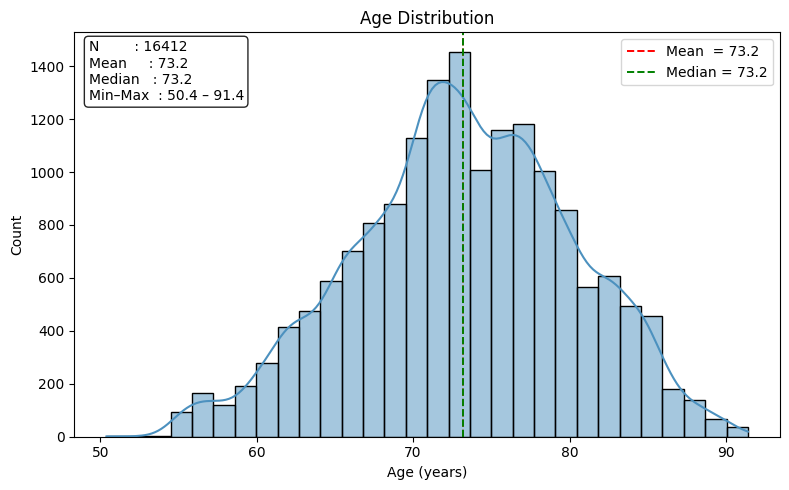

In [ ]:
# Age distribution
# --- 1.  basic stats -------------------------------------------------
age_series = Adni_cd['AGE'].dropna()
n        = int(age_series.count())
mean_age = age_series.mean()
med_age  = age_series.median()
min_age  = age_series.min()
max_age  = age_series.max()

# --- 2.  plot --------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(age_series, bins=30, kde=True, color="#4C91BF")
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')

# mean & median guide-lines
plt.axvline(mean_age,  color='red',   ls='--', lw=1.4, label=f'Mean  = {mean_age:.1f}')
plt.axvline(med_age,   color='green', ls='--', lw=1.4, label=f'Median = {med_age:.1f}')
plt.legend()

# --- 3.  text box with summary --------------------------------------
txt  = (f'N        : {n}\n'
        f'Mean     : {mean_age:.1f}\n'
        f'Median   : {med_age:.1f}\n'
        f'Min–Max  : {min_age:.1f} – {max_age:.1f}')
props = dict(boxstyle='round', facecolor='white', alpha=0.85)
plt.text(0.02, 0.98, txt, transform=plt.gca().transAxes,
         fontsize=10, va='top', bbox=props)

plt.tight_layout()
plt.show()




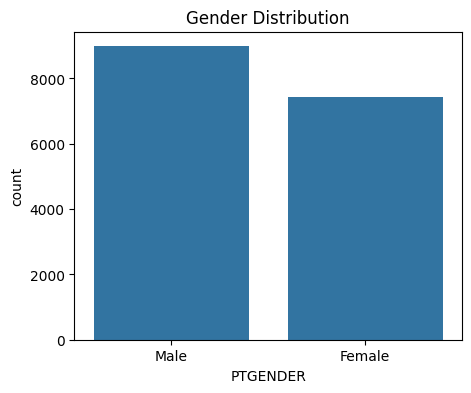

In [ ]:
# Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(x='PTGENDER', data=Adni_cd)
plt.title('Gender Distribution')
plt.show()



#### Clinical Data

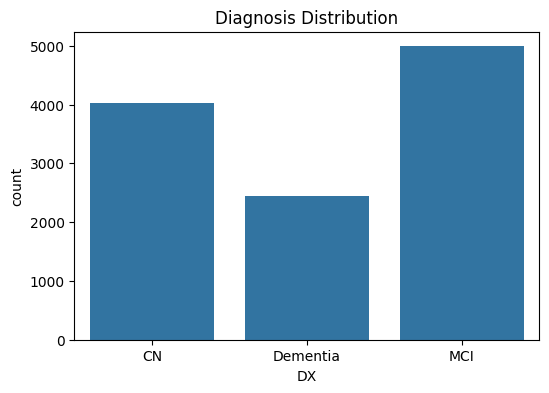

In [ ]:
# Diagnosis distribution
plt.figure(figsize=(6,4))
sns.countplot(x='DX', data=Adni_cd)
plt.title('Diagnosis Distribution')
plt.show()





This bar chart shows how many study visits fall into each diagnostic group recorded in ADNI:

MCI (Mild Cognitive Impairment) is the largest category, with roughly 5 000 visits.

CN (Cognitively Normal) accounts for about 4 000 visits.

Dementia / AD is the smallest group, at around 2 500 visits.

The take-away is that this dataset is not perfectly balanced: there are twice as many MCI visits as dementia visits. When we train classifiers need to correct for this by using class-balanced loss weights or sampling. so the model doesn’t become biased toward the majority (MCI) class.

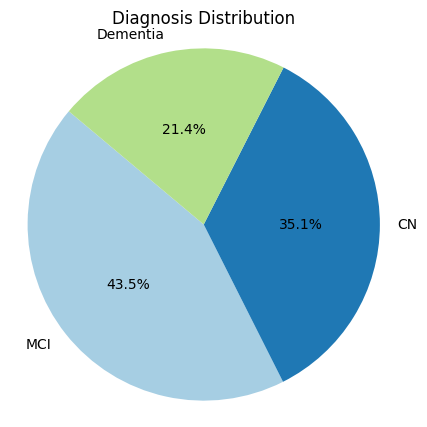

In [ ]:
#Diagnosis Distribution - pie chart
# Define the diagnosis labels and their corresponding counts directly
labels = ['MCI', 'CN', 'Dementia']
sizes = [4989, 4020, 2449]


# Using a Matplotlib colormap for colors
colors = plt.cm.Paired.colors

plt.figure(figsize=(5, 5))

# Create the pie chart
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',  # Format for displaying percentages on slices
        startangle=140,     # Angle at which the first slice starts
        colors=colors,      # Apply the chosen colors to the slices
        pctdistance=0.55)   # Distance of percentage labels from the center

plt.title('Diagnosis Distribution') # Title of the pie chart
plt.axis('equal') # Ensures the pie chart is drawn as a perfect circle.
plt.show()


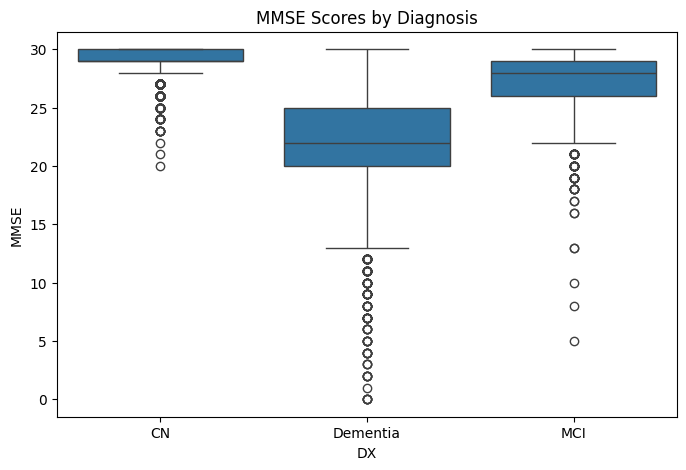

In [ ]:
# MMSE by diagnosis
#MMSE: Mini-Mental State Examination (higher = better cognition)
plt.figure(figsize=(8,5))
sns.boxplot(x='DX', y='MMSE', data=Adni_cd)
plt.title('MMSE Scores by Diagnosis')
plt.show()



The box-plot shows how Mini-Mental State Examination (MMSE) scores decline with disease severity. MMSE is a clinical test method which is used to identify the diffrent categories patients.

Cognitively-Normal (CN) participants cluster near the maximum score (≈ 30), indicating intact cognition.

Mild Cognitive Impairment (MCI) subjects score a few points lower (mid- to high-20 s) with moderate spread.

Dementia/AD cases have the lowest and most variable scores (median low-20 s, some below 10), reflecting pronounced impairment.

The clear step-down across groups confirms that MMSE is a strong indicator of cognitive status and can help differentiate CN, MCI, and dementia in the models.

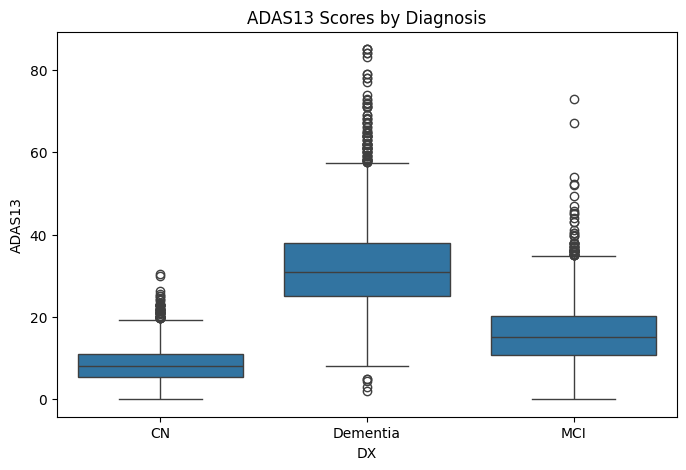

In [ ]:
# ADAS13 by diagnosis
plt.figure(figsize=(8,5))
sns.boxplot(x='DX', y='ADAS13', data=Adni_cd)
plt.title('ADAS13 Scores by Diagnosis')
plt.show()

The plot depicts ADAS-Cog 13 (Alzheimer’s Disease Assessment Scale – 13-item version) scores for each diagnostic group.
ADAS13 is a cognitive test ranging from 0 (no impairment) to 85+ (severe impairment) so higher scores mean worse cognition.

CN (healthy controls) cluster at the bottom (median < 10), showing little to no impairment.

MCI patients sit in the mid-range (roughly 10 – 25), reflecting mild but measurable deficits.

Dementia/AD cases occupy the top of the scale (median ≈ 30, with some > 60), indicating substantial cognitive decline.

The step-wise increase confirms that ADAS13 cleanly separates the three groups and can serve as a strong clinical feature for your predictive models.

# Explore Other Clinical Variables




ADNI includes a rich set of clinical variables beyond diagnosis, age, and MMSE.

Commonly analyzed features include:

* APOE genotype (genetic risk factor)

* ADAS13, CDRSB, FAQ (cognitive and functional assessments)

* CSF biomarkers (Aβ42, t-tau, p-tau181)

* Medical history and blood test results

### APOE genotype (genetic risk factor)

/tmp/ipython-input-16-1920035634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=allele_counts.index.astype(int),


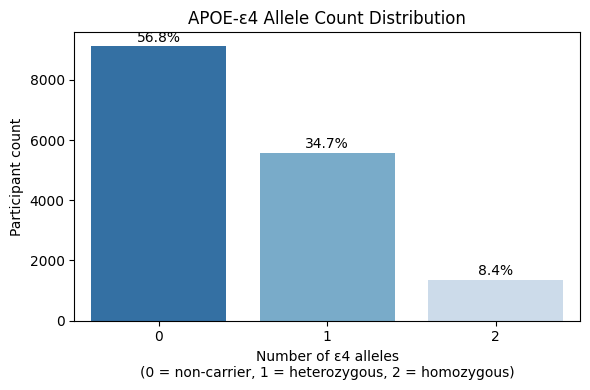

In [ ]:
# --- frequency table ---
allele_counts = Adni_cd['APOE4'].value_counts().sort_index()   # 0,1,2 copies
allele_pct    = 100 * allele_counts / allele_counts.sum()

# --- bar plot ---
plt.figure(figsize=(6,4))
sns.barplot(x=allele_counts.index.astype(int),
            y=allele_counts.values,
            palette='Blues_r')
plt.title('APOE-ε4 Allele Count Distribution')
plt.xlabel('Number of ε4 alleles\n(0 = non-carrier, 1 = heterozygous, 2 = homozygous)')
plt.ylabel('Participant count')

# optional: annotate bars with %
for idx,val in enumerate(allele_counts.values):
    plt.text(idx, val+150, f'{allele_pct.iloc[idx]:.1f}%', ha='center')

plt.tight_layout()
plt.show()



The bar-chart shows how many ADNI participants carry the Alzheimer’s-risk APOE-ε4 allele:

0 copies (non-carriers) – about 9 100 subjects (≈ 56 %)

1 copy (heterozygous carriers) – roughly 5 600 subjects (≈ 34 %)

2 copies (homozygous carriers) – about 1 350 subjects (≈ 8 %)

This means just under half of the cohort carries at least one ε4 allele, while homozygous high-risk individuals are relatively rare. When training models or interpreting cognitive scores, remember that ε4 status is a strong genetic risk factor; including it as a feature or stratifying analyses by carrier status can improve predictive performance and reduce confounding.

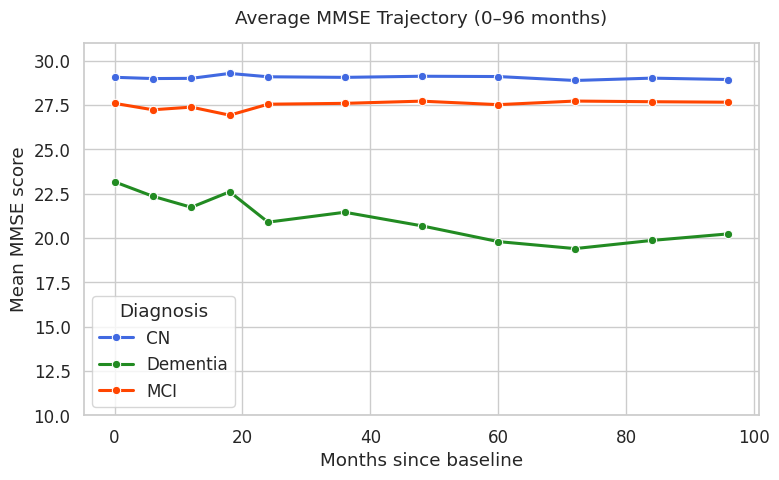

In [ ]:
# Average MMSE trajectory by diagnosis group


# ----- tidy VISCODE into numeric months -------------------------------
code2month = {'bl':0, 'm03':3, 'm06':6, 'm12':12, 'm18':18, 'm24':24,
              'm36':36, 'm48':48, 'm60':60, 'm72':72, 'm84':84, 'm96':96}
tmp = Adni_cd[['VISCODE','DX','MMSE']].dropna()
tmp = tmp[tmp.VISCODE.isin(code2month)].copy()
tmp['Months'] = tmp.VISCODE.map(code2month)

# ----- group-by mean ---------------------------------------------------
mean_mmse = tmp.groupby(['Months','DX'], as_index=False)['MMSE'].mean()

# ----- nicer line-plot -------------------------------------------------
sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(8,5))
sns.lineplot(data=mean_mmse, x='Months', y='MMSE', hue='DX',
             marker='o', linewidth=2.2, palette=['royalblue','forestgreen','orangered'])

plt.title('Average MMSE Trajectory (0–96 months)', pad=14)
plt.xlabel('Months since baseline')
plt.ylabel('Mean MMSE score')
plt.ylim(10, 31)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()



The lines track how average Mini-Mental State Examination (MMSE) scores change over eight years:

Cognitively-normal (blue) scores stay near the ceiling (≈ 29–30) throughout—little cognitive decline.

MCI (green) starts a few points lower (≈ 27–28) and shows a mild downward drift after year 3, consistent with gradual impairment.

Dementia/AD (orange) begins much lower (≈ 23–24) and declines further over time, dropping below 20 by year 6.

This clear separation confirms that MMSE captures disease progression, and the diverging slopes illustrate why baseline MMSE and its longitudinal trends are valuable predictors in early-AD models.

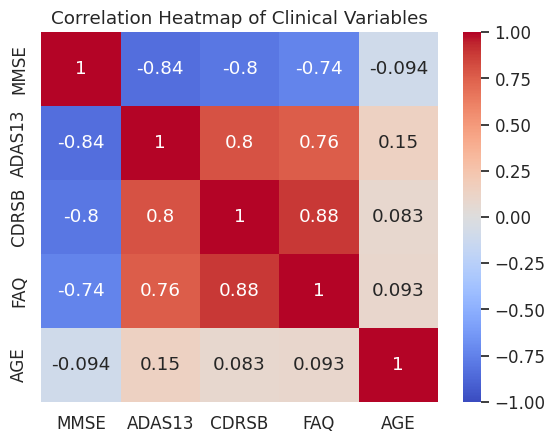

In [ ]:
# Correlation heatmap
import numpy as np
clinical_vars = ['MMSE', 'ADAS13', 'CDRSB', 'FAQ', 'AGE']
corr = Adni_cd[clinical_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Clinical Variables')
plt.show()




The heat-map shows how five key clinical measures move together:

MMSE vs. the others – deep-blue cells (≈ –0.8) mean higher MMSE scores (better cognition) are strongly linked to lower impairment on ADAS-Cog 13, CDR-SB, and FAQ.

ADAS13, CDRSB, FAQ – bright-red correlations (0.76 – 0.88) indicate these three impairment scales rise and fall in sync, so they convey overlapping information about cognitive decline and daily-function loss.

Age – values hover near zero (–0.09 to 0.15), telling us age by itself is only weakly correlated with the test scores once diagnosis is mixed in.

Take-away: MMSE moves in the opposite direction to the impairment scales, and the three impairment scales are almost interchangeable statistically. Age adds relatively little linear signal, suggesting your model should keep MMSE plus one of ADAS/ CDR/ FAQ to avoid redundant features, while treating age as a modest auxiliary predictor.

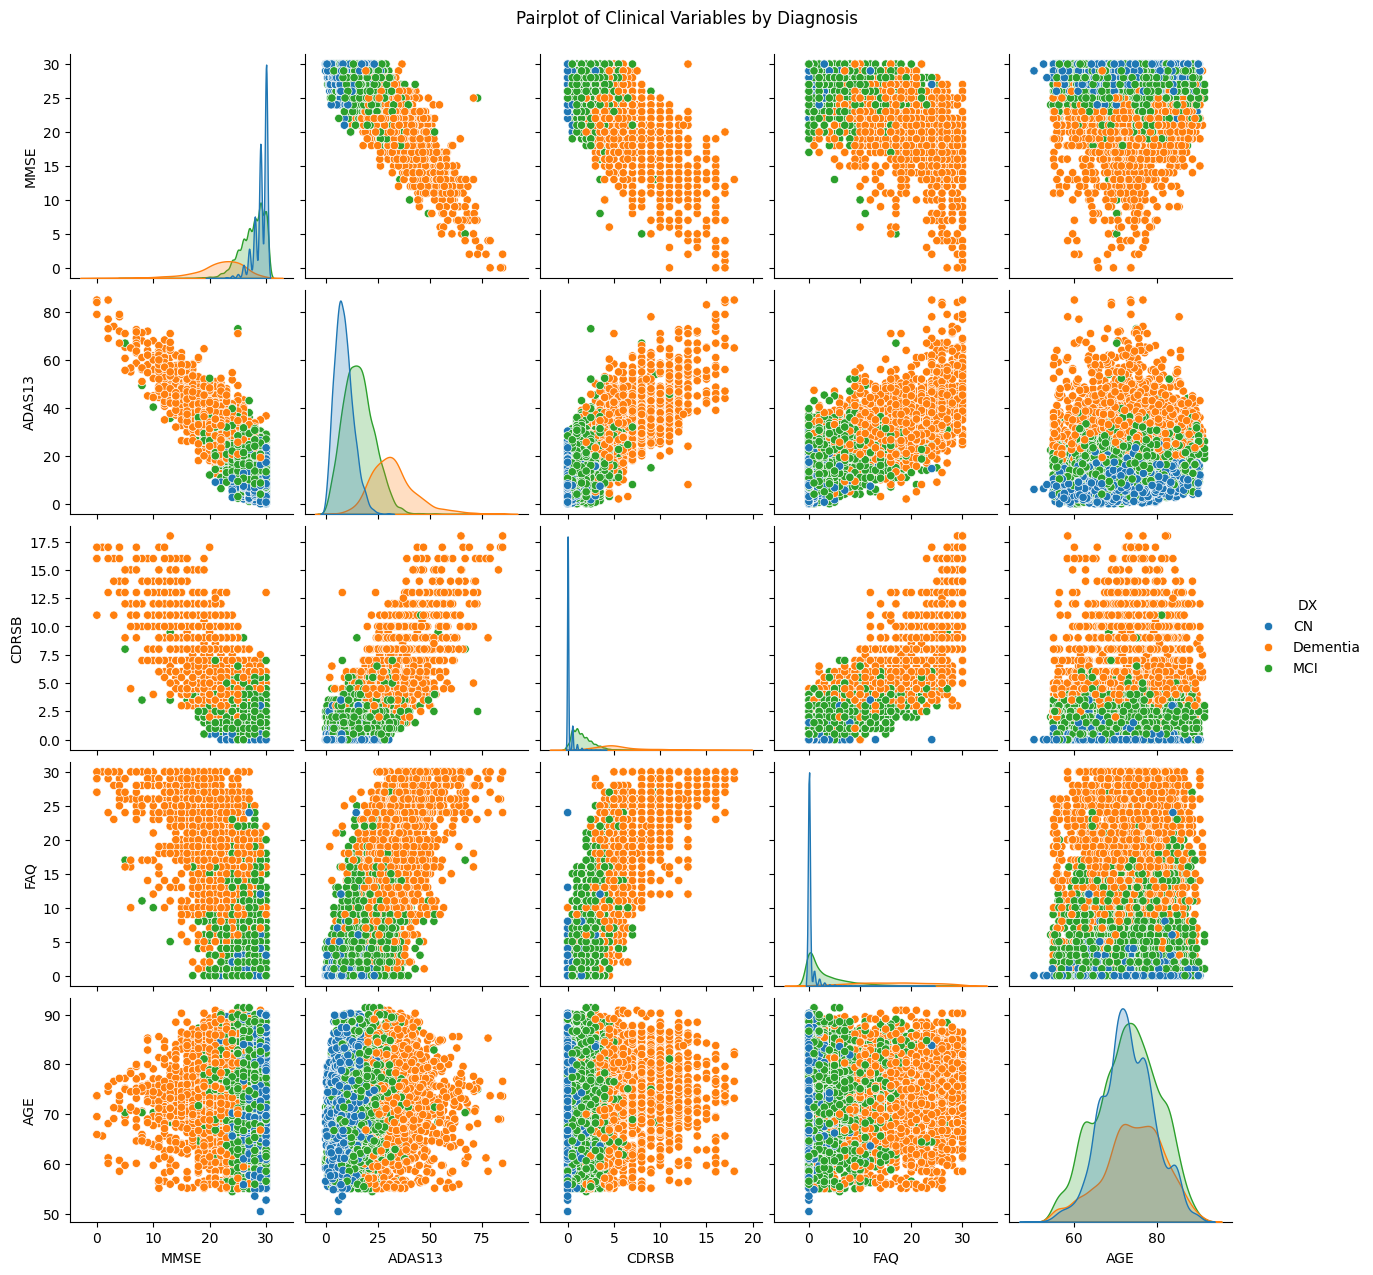

In [ ]:
# Pairplot for selected variables
sns.pairplot(Adni_cd, vars=clinical_vars, hue='DX')
plt.suptitle('Pairplot of Clinical Variables by Diagnosis', y=1.02)
plt.show()

The scatter-matrix lets you see, in a single glance, how five clinical measures separate the three diagnostic groups:

Blue CN points cluster in the upper left of each scatter panel high MMSE but very low ADAS-13, CDR-SB, and FAQ—confirming minimal impairment.

Orange Dementia points occupy the opposite corner, low MMSE and high scores on all three impairment scales, while green MCI points lie between, forming a diagonal bridge from CN to Dementia.

The dense diagonal stripes in the off-diagonal plots show that ADAS-13, CDR-SB, and FAQ rise together and all fall as MMSE rises, mirroring the correlation heat-map.

By contrast, the AGE column shows broad overlap of all three colours: age alone offers little diagnostic separation once cognitive scores are known.

Overall, the pairplot visually confirms that MMSE plus any one of the impairment scales provide strong, complementary signals for distinguishing CN, MCI, and dementia, whereas age contributes comparatively little by itself.

# Classification VS Regression

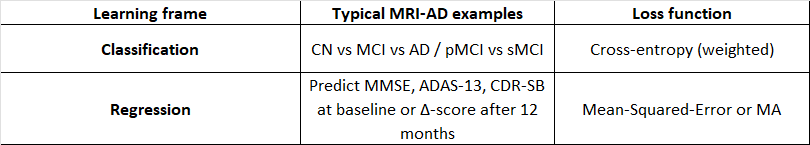

Why classification is a sensible first step
* Labels (DX) are already discrete and clinically meaningful.

* Evaluation is straightforward (accuracy, ROC-AUC).

* Models/architectures in the literature (Li 2022, Wang 2019, Swin, Mamba) are set up for classification, can compare apples to apples.